<a href="https://colab.research.google.com/github/siu1997/Internship/blob/main/Task3_Exploratory_Data_Analysis_Retail.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#GRIP @The Sparks Foundation
July2021

#Author: Shreyans Upadhyay

#Task 3: Exploratory Data Analysis-Retail


As a business manager, we have to find out the weak areas where you can work make more profit. In this task, we have to derive the business problem by exploring the data.

#Step 1: Importing the necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#Step 2 Load the Dataset

In [2]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
Location="drive/My Drive/Dataset"

In [4]:
df=pd.read_csv(Location+ "/SampleSuperstore (1).csv")

In [5]:
#Print the first five elements of the dataset
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [6]:
#Print the last five elements of the dataset
df.tail()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
9989,Second Class,Consumer,United States,Miami,Florida,33180,South,Furniture,Furnishings,25.248,3,0.2,4.1028
9990,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Furniture,Furnishings,91.960,2,0.0,15.6332
9991,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Technology,Phones,258.576,2,0.2,19.3932
9992,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Office Supplies,Paper,29.600,4,0.0,13.3200
9993,Second Class,Consumer,United States,Westminster,California,92683,West,Office Supplies,Appliances,243.160,2,0.0,72.9480


In [7]:
#check the shape, info and the data types of the dataset
df.shape, df.info(), df.dtypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


((9994, 13), None, Ship Mode        object
 Segment          object
 Country          object
 City             object
 State            object
 Postal Code       int64
 Region           object
 Category         object
 Sub-Category     object
 Sales           float64
 Quantity          int64
 Discount        float64
 Profit          float64
 dtype: object)

There are 9994 rows and 13 columnes present in our dataset.

In [8]:
#check the statistical values of the dataset
df.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [9]:
#check the missing values of the dataset
df.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

There is no null value present in the dataset

In [10]:
df.corr()

,Postal Code,Sales,Quantity,Discount,Profit
Postal Code,1.000000,-0.023854,0.012761,0.058443,-0.029961
Sales,-0.023854,1.000000,0.200795,-0.028190,0.479064
Quantity,0.012761,0.200795,1.000000,0.008623,0.066253
Discount,0.058443,-0.028190,0.008623,1.000000,-0.219487
Profit,-0.029961,0.479064,0.066253,-0.219487,1.000000


In [11]:
df.cov()

,Postal Code,Sales,Quantity,Discount,Profit
Postal Code,1.028080e+09,-476682.766590,910.415885,386.870404,-225045.849445
Sales,-4.766828e+05,388434.455308,278.459923,-3.627228,69944.096586
Quantity,9.104159e+02,278.459923,4.951113,0.003961,34.534769
Discount,3.868704e+02,-3.627228,0.003961,0.042622,-10.615173
Profit,-2.250458e+05,69944.096586,34.534769,-10.615173,54877.798055


In [12]:
print(df['Category'].describe())

count                9994
unique                  3
top       Office Supplies
freq                 6026
Name: Category, dtype: object


In [13]:
print(df['Sub-Category'].describe())

count        9994
unique         17
top       Binders
freq         1523
Name: Sub-Category, dtype: object


In [14]:
print(df['City'].describe())

count              9994
unique              531
top       New York City
freq                915
Name: City, dtype: object


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


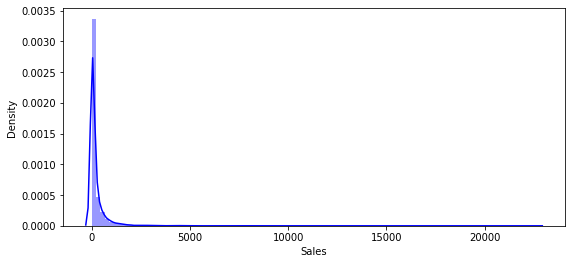

In [15]:
#Sales distribution
plt.figure(figsize=(9, 4))
sns.distplot(df['Sales'], color='blue', bins=100, hist_kws={'alpha': 0.4});

In [16]:
duplicate=df.duplicated()
print(duplicate.sum())
df[duplicate]

17


,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
950,Standard Class,Home Office,United States,Philadelphia,Pennsylvania,19120,East,Office Supplies,Paper,15.552,3,0.2,5.4432
3406,Standard Class,Home Office,United States,Columbus,Ohio,43229,East,Furniture,Chairs,281.372,2,0.3,-12.0588
3670,Standard Class,Consumer,United States,Salem,Oregon,97301,West,Office Supplies,Paper,10.368,2,0.2,3.6288
4117,Standard Class,Consumer,United States,Los Angeles,California,90036,West,Office Supplies,Paper,19.440,3,0.0,9.3312
4553,Standard Class,Consumer,United States,San Francisco,California,94122,West,Office Supplies,Paper,12.840,3,0.0,5.7780
5905,Same Day,Home Office,United States,San Francisco,California,94122,West,Office Supplies,Labels,41.400,4,0.0,19.8720
6146,Standard Class,Corporate,United States,San Francisco,California,94122,West,Office Supplies,Art,11.760,4,0.0,3.1752
6334,Standard Class,Consumer,United States,New York City,New York,10011,East,Office Supplies,Paper,49.120,4,0.0,23.0864
6357,Standard Class,Corporate,United States,Seattle,Washington,98103,West,Office Supplies,Paper,25.920,4,0.0,12.4416
7608,Standard Class,Consumer,United States,San Francisco,California,94122,West,Office Supplies,Paper,25.920,4,0.0,12.4416


There are 17 duplicate records in our dataset

In [17]:
#drop the duplicate values
df.drop_duplicates(inplace=True)

In [18]:
#check again for duplicates
dpl=df.duplicated()
dpl.sum()

0

Now there are no duplicate records in the dataset

In [19]:
df.columns

Index(['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Category', 'Sub-Category', 'Sales', 'Quantity', 'Discount',
       'Profit'],
      dtype='object')

In [20]:
#check the unique values in the dataset
df.nunique()

Ship Mode          4
Segment            3
Country            1
City             531
State             49
Postal Code      631
Region             4
Category           3
Sub-Category      17
Sales           5825
Quantity          14
Discount          12
Profit          7287
dtype: int64

In [21]:
df['Category'].unique()

array(['Furniture', 'Office Supplies', 'Technology'], dtype=object)

In [22]:
df['Sub-Category'].unique()

array(['Bookcases', 'Chairs', 'Labels', 'Tables', 'Storage',
       'Furnishings', 'Art', 'Phones', 'Binders', 'Appliances', 'Paper',
       'Accessories', 'Envelopes', 'Fasteners', 'Supplies', 'Machines',
       'Copiers'], dtype=object)

Text(0.5, 1.0, 'Analyzing Segment of people buying from Superstore')

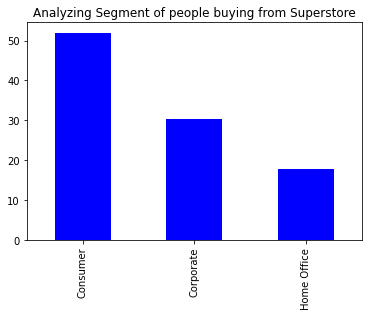

In [23]:
segment=(df['Segment'].value_counts()/len(df['Segment'])*100).plot(kind='bar', color='Blue')
plt.title('Analyzing Segment of people buying from Superstore')

([<matplotlib.patches.Wedge at 0x7f144c76b3d0>,
 [Text(-0.0673271932456651, 1.0979376344081029, 'Consumer'),
  Text(-0.5263377375767172, -0.9659029899542826, 'Corporate'),
  Text(0.9318767010824192, -0.5844705415842171, 'Home Office')],
 [Text(-0.0367239235885446, 0.5988750733135106, '51.9%'),
  Text(-0.2870933114054821, -0.5268561763386995, '30.2%'),
  Text(0.5082963824085922, -0.3188021135913911, '17.8%')])

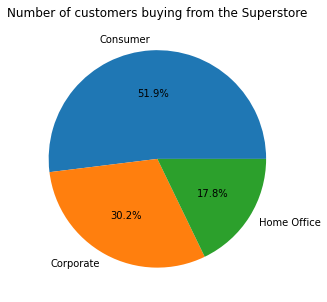

In [24]:
plt.figure(figsize=(12,5))
plt.title("Number of customers buying from the Superstore")
plt.pie(df['Segment'].value_counts(),labels=df['Segment'].value_counts().index, autopct='%1.1f%%')

From the above chart we can conclude that, 51.9% are consumers buying from the Superstore, 30.2% are from corporate and 17.8% are the Home Office poeple who buy from the Superstore.

In [25]:
df['Ship Mode'].value_counts()

Standard Class    5955
Second Class      1943
First Class       1537
Same Day           542
Name: Ship Mode, dtype: int64

Text(0.5, 1.0, 'Analyzing Ship Mode for Superstore')

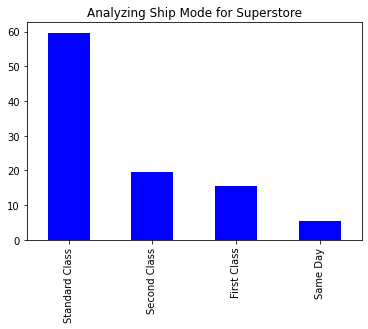

In [26]:
ship_mode=(df['Ship Mode'].value_counts()/len(df['Ship Mode'])*100).plot(kind='bar', color='Blue')
plt.title('Analyzing Ship Mode for Superstore')

([<matplotlib.patches.Wedge at 0x7f144ed4d490>,
 [Text(-0.32962457301025583, 1.0494511140914602, 'Standard Class'),
  Text(-0.3775057080207549, -1.0331938058330337, 'Second Class'),
  Text(0.7461624595548612, -0.8082336196614445, 'First Class'),
  Text(1.0840189091308712, -0.18682345850218163, 'Same Day')],
 [Text(-0.1797952216419577, 0.5724278804135237, '59.7%'),
  Text(-0.2059122043749572, -0.5635602577271093, '19.5%'),
  Text(0.4069977052117424, -0.4408547016335151, '15.4%'),
  Text(0.5912830413441115, -0.1019037046375536, '5.4%')])

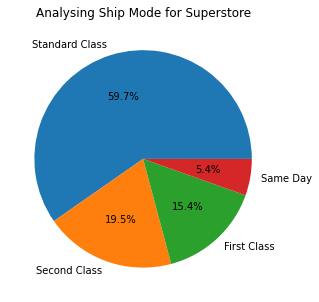

In [27]:
plt.figure(figsize=(12,5))
plt.title("Analysing Ship Mode for Superstore")
plt.pie(df['Ship Mode'].value_counts(),labels=df['Ship Mode'].value_counts().index, autopct='%1.1f%%')

From the above chart we can conclude that 59.7% of the deliveries belog to the Standard Class, 19.5% belongs to the Second Class, 15.4% belongs tothe First Class whereas 5.4% of the deliveries made on the same day.

Analyzing Sub category of the items in the Superstore.

Text(0.5, 1.0, 'Analyzing Sub Category of items in Superstore')

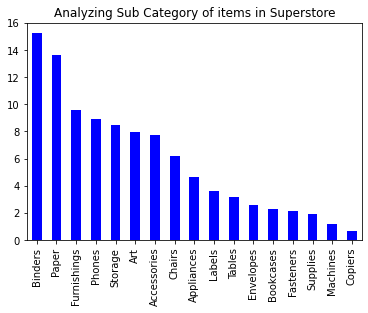

In [28]:
sub_category=(df['Sub-Category'].value_counts()/len(df['Sub-Category'])*100).plot(kind='bar', color='Blue')
plt.title('Analyzing Sub Category of items in Superstore')

([<matplotlib.patches.Wedge at 0x7f144c6bf610>,
 [Text(0.976073756684635, 0.5072277806977297, 'Binders'),
  Text(0.2016538437473977, 1.081358278879808, 'Paper'),
  Text(-0.5698750957020162, 0.9408731983102814, 'Furnishings'),
  Text(-0.9927555531357746, 0.4737472023327234, 'Phones'),
  Text(-1.0943856106501602, -0.1109961044445972, 'Storage'),
  Text(-0.8966693479300548, -0.6371688006193416, 'Art'),
  Text(-0.4869899755703049, -0.9863269050847361, 'Accessories'),
  Text(-0.023032083622319597, -1.0997588477134497, 'Chairs'),
  Text(0.3454481080284471, -1.044349369061698, 'Appliances'),
  Text(0.6032749708252737, -0.9198148235246948, 'Labels'),
  Text(0.7854334460362346, -0.7701261596956992, 'Tables'),
  Text(0.9108832734856797, -0.6166779241095085, 'Envelopes'),
  Text(0.9936488204365672, -0.47187076794925403, 'Bookcases'),
  Text(1.0498137341525071, -0.32846784254287287, 'Fasteners'),
  Text(1.0831847727456425, -0.19160049084480674, 'Supplies'),
  Text(1.0965661256424153, -0.0868489038

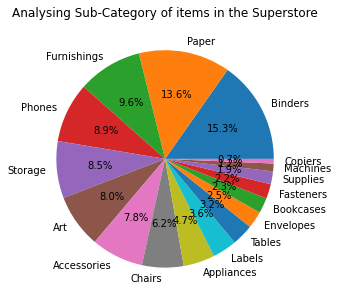

In [29]:
plt.figure(figsize=(12,5))
plt.title("Analysing Sub-Category of items in the Superstore")
plt.pie(df['Sub-Category'].value_counts(),labels=df['Sub-Category'].value_counts().index, autopct='%1.1f%%')

From the above chart we can conclude that most of the sub-Category falls under Office supply.

Analyzing category, the items belong in the superstore

Text(0.5, 1.0, 'Analyzing Category the items belong in Superstore')

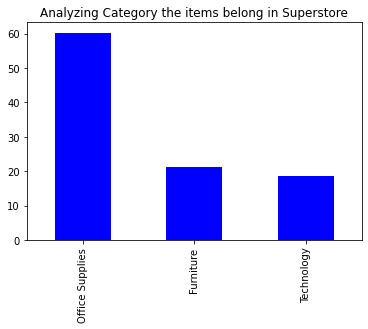

In [30]:
category=(df['Category'].value_counts()/len(df['Category'])*100).plot(kind='bar', color='Blue')
plt.title('Analyzing Category the items belong in Superstore')

([<matplotlib.patches.Wedge at 0x7f144c5d8a90>,
 [Text(-0.3484064762155767, 1.0433661520918938, 'Office Supplies'),
  Text(-0.2820512427913923, -1.063224856951638, 'Furniture'),
  Text(0.9191494357368781, -0.6042882712618032, 'Technology')],
 [Text(-0.1900398961175873, 0.569108810231942, '60.3%'),
  Text(-0.1538461324316685, -0.5799408310645298, '21.2%'),
  Text(0.5013542376746608, -0.32961178432461985, '18.5%')])

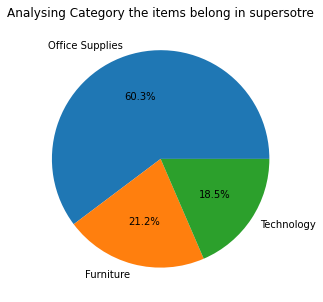

In [31]:
plt.figure(figsize=(12,5))
plt.title("Analysing Category the items belong in supersotre")
plt.pie(df['Category'].value_counts(),labels=df['Category'].value_counts().index, autopct='%1.1f%%')

From the above chart, we can conclude that Office has the highest sales whereas the Technology has the least sales.

Find the maximum order of Sub-Category itmes

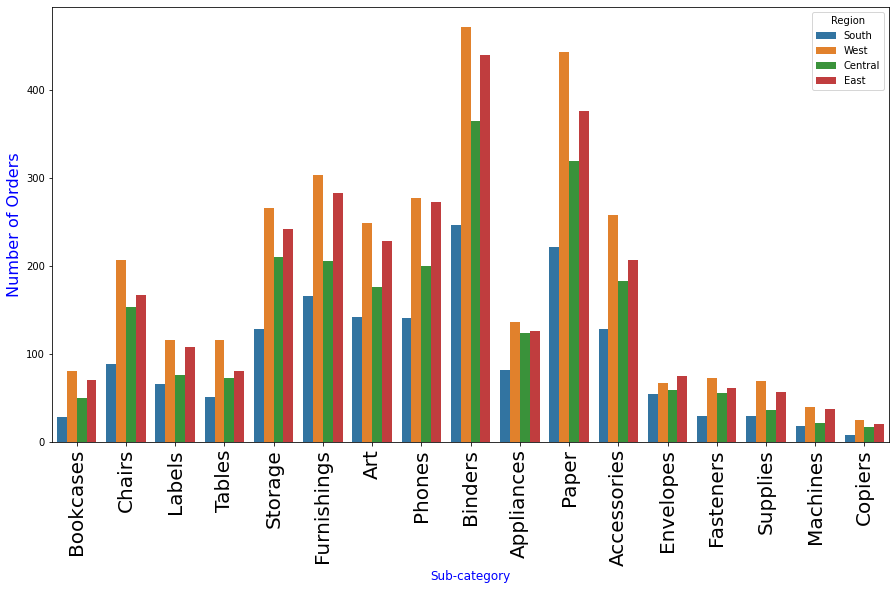

In [32]:
plt.figure(figsize=(15,8))
sns.countplot(x='Sub-Category', hue="Region", data=df)
plt.xlabel("Sub-category", size=12, color='Blue')
plt.ylabel("Number of Orders", size=16, color='blue')
plt.xticks(rotation="vertical", size=20)
plt.show()

From the above chart, we can conclude that Binders have maximum sales followed by Papers in all the Regions. On the other hand, copiers has least number of orders.

Using Countplot to plot state and number of orders with respect to region

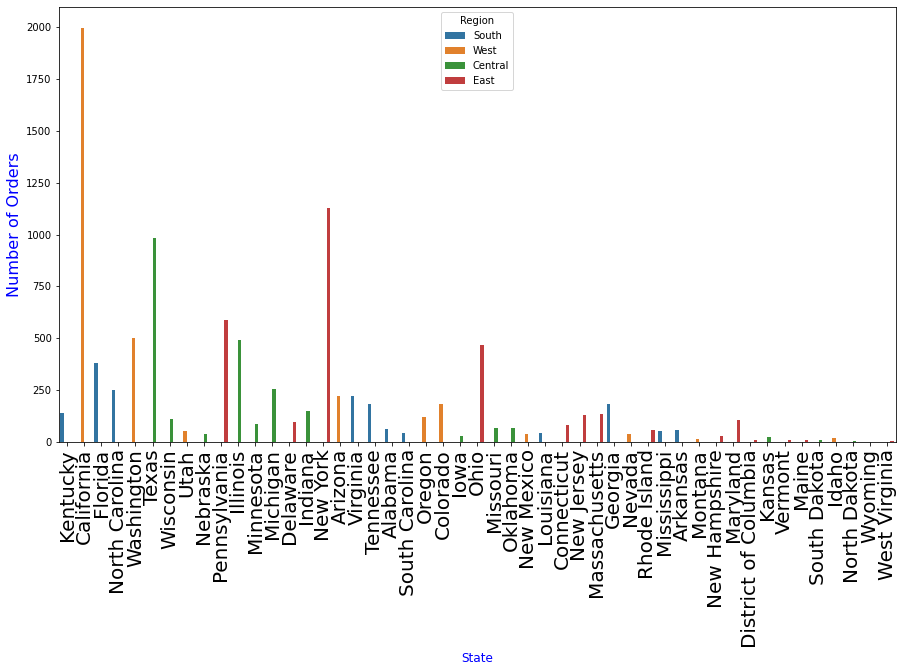

In [33]:
plt.figure(figsize=(15,8))
sns.countplot(x='State', hue="Region", data=df)
plt.xlabel("State", size=12, color='Blue')
plt.ylabel("Number of Orders", size=16, color='blue')
plt.xticks(rotation="vertical", size=20)
plt.show()

From the above graph, we can conclude that California West has maximum number of orders as compared to New York East

Plot the state with highest order without including Region

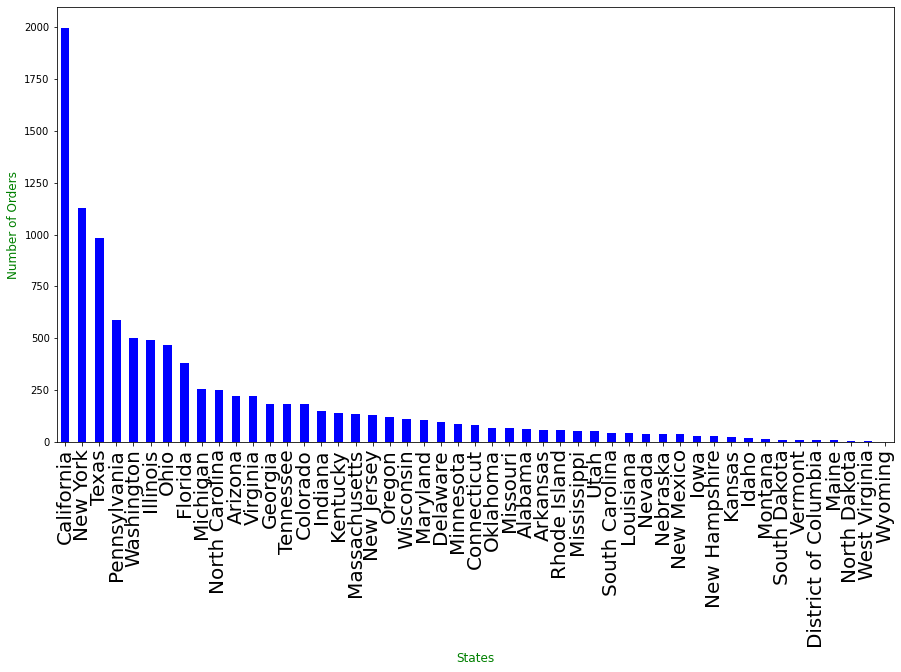

In [34]:
plt.figure(figsize=(15,8))
df['State'].value_counts().plot.bar(color='blue')
plt.xlabel('States', size=12, color='green')
plt.xticks(size=20)
plt.ylabel('Number of Orders', size=12, color='Green')
plt.show()

California has highest number of orders

Maximum profit of a particular item

In [35]:
profit=pd.DataFrame(df.groupby('Sub-Category').sum()['Profit'])
profit

,Profit
Sub-Category,
Accessories,41936.6357
Appliances,18138.0054
Art,6524.6118
Binders,30228.0003
Bookcases,-3472.5560
Chairs,26567.1278
Copiers,55617.8249
Envelopes,6964.1767
Fasteners,949.5182


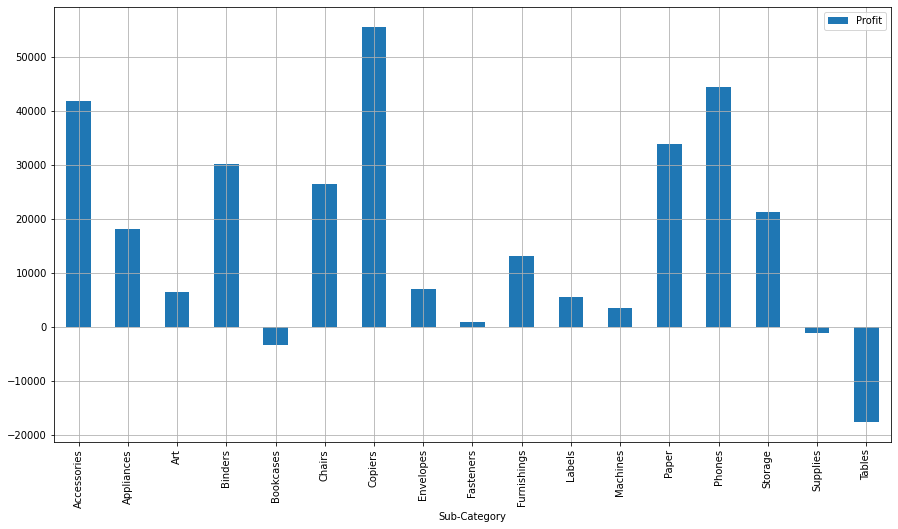

In [36]:
profit.plot.bar(figsize=(15,8), grid=True)
plt.show()

Maximum Sales of a particular item

In [37]:
sales=pd.DataFrame(df.groupby('Sub-Category').sum()['Sales'])
sales

,Sales
Sub-Category,
Accessories,167380.3180
Appliances,107532.1610
Art,27107.0320
Binders,203409.1690
Bookcases,114879.9963
Chairs,327777.7610
Copiers,149528.0300
Envelopes,16476.4020
Fasteners,3024.2800


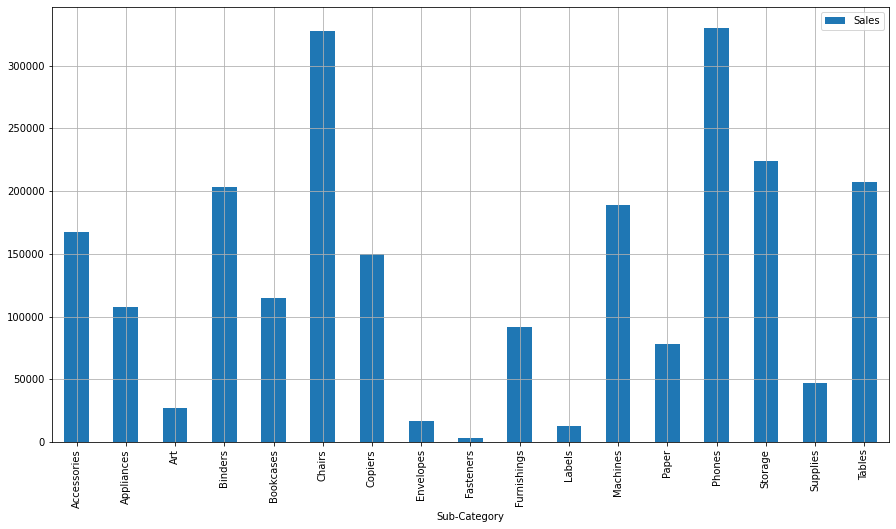

In [38]:
sales.plot.bar(figsize=(15,8), grid=True)
plt.show()

Phone has highest number of sales

Maximum profit of a particular item that belongs to

In [39]:
category_profit=pd.DataFrame(df.groupby('Category').sum()['Profit'])
category_profit

,Profit
Category,
Furniture,18421.8137
Office Supplies,122364.6608
Technology,145454.9481


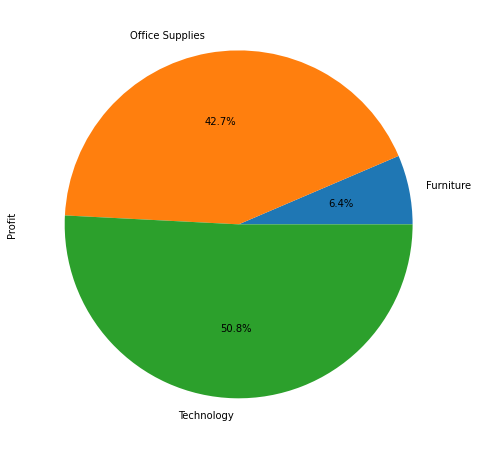

In [40]:
plt.figure(figsize=(15,8))
category_profit.groupby('Category').sum()['Profit'].plot.pie(autopct='%1.1f%%')

From the above chart it is clear that Technology has the highest profit

Finding the maximum sales of a particular item that belongs to 

In [41]:
category_sales=pd.DataFrame(df.groupby('Category').sum()['Sales'])
category_sales

,Sales
Category,
Furniture,741306.3133
Office Supplies,718735.2440
Technology,836154.0330


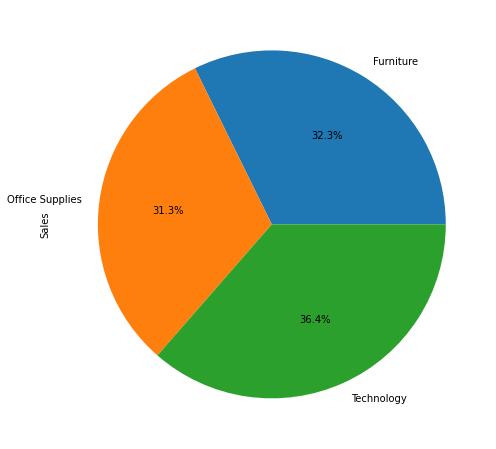

In [42]:
plt.figure(figsize=(15,8))
category_sales.groupby('Category').sum()['Sales'].plot.pie(autopct='%1.1f%%')

from the above chart, Technology has highest number of Sales

finding out Sattes that has more profit

In [43]:
states_profit=pd.DataFrame(df.groupby('State').sum()['Profit'])
states_profit

,Profit
State,
Alabama,5786.8253
Arizona,-3427.9246
Arkansas,4008.6871
California,76330.7891
Colorado,-6527.8579
Connecticut,3511.4918
Delaware,9977.3748
District of Columbia,1059.5893
Florida,-3399.3017


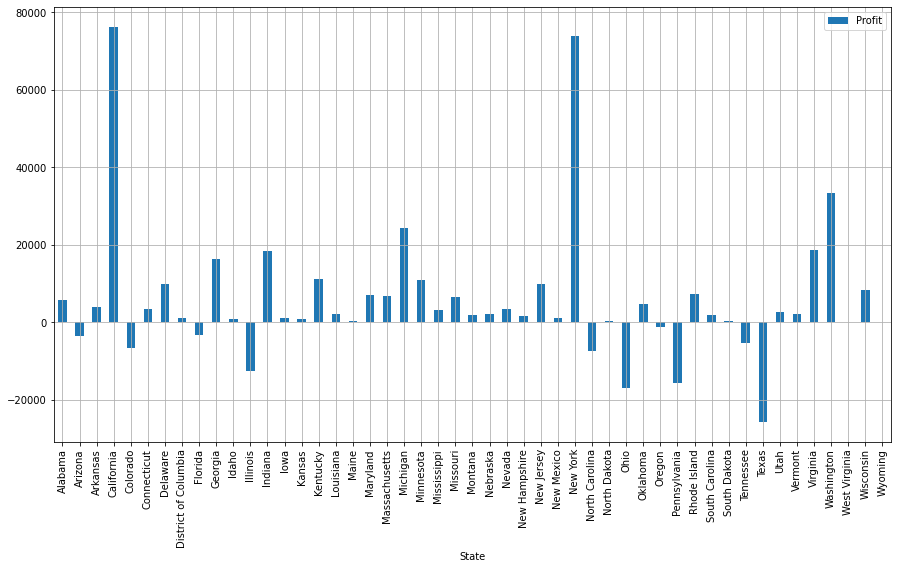

In [44]:
states_profit.plot.bar(figsize=(15,8), grid=True)
plt.show()

California has highest profit

State with more sales

In [45]:
states_sales=pd.DataFrame(df.groupby('State').sum()['Sales'])
states_sales

,Sales
State,
Alabama,19510.6400
Arizona,35282.0010
Arkansas,11678.1300
California,457576.2715
Colorado,32108.1180
Connecticut,13384.3570
Delaware,27451.0690
District of Columbia,2865.0200
Florida,89473.7080


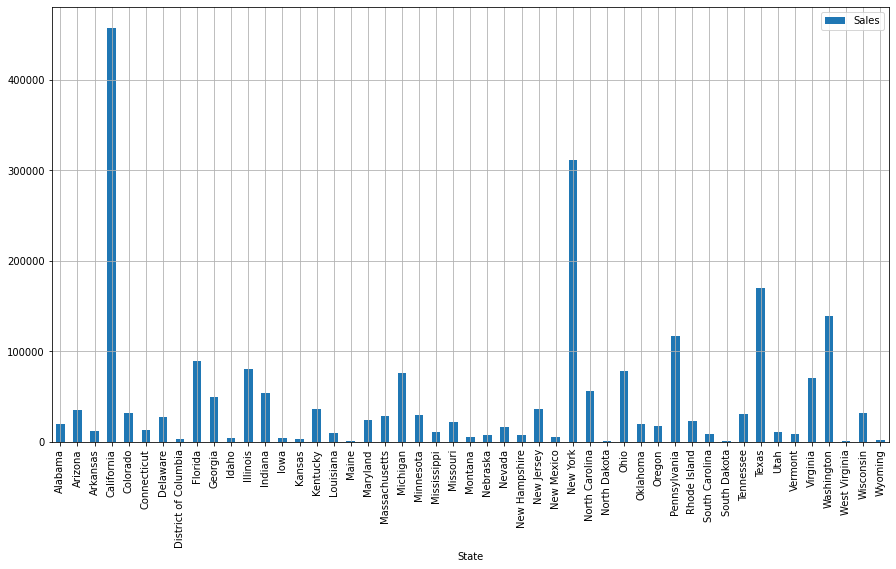

In [46]:
states_sales.plot.bar(figsize=(15,8), grid=True)
plt.show()

California has highest number of Sales

In [47]:
region_sales=pd.DataFrame(df.groupby('Region').sum()['Sales'])
region_sales

,Sales
Region,
Central,500782.8528
East,678435.1960
South,391721.9050
West,725255.6365


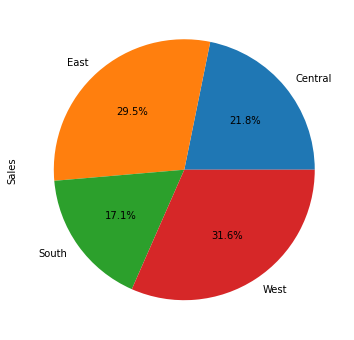

In [48]:
plt.figure(figsize=(15,6))
df.groupby('Region').sum()['Sales'].plot.pie(autopct='%1.1f%%')

West Region has highest number of sales

Region with Highest Profit

In [49]:
region_profit=pd.DataFrame(df.groupby('Region').sum()['Profit'])
region_profit

,Profit
Region,
Central,39655.8752
East,91506.3092
South,46749.4303
West,108329.8079


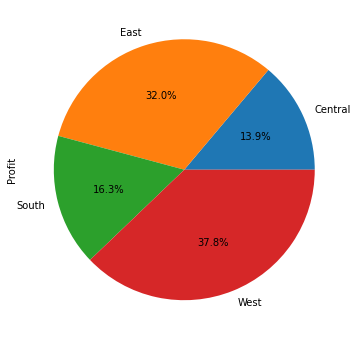

In [50]:
plt.figure(figsize=(15,6))
df.groupby('Region').sum()['Profit'].plot.pie(autopct='%1.1f%%')

Western Region has the Highest Profit

#Conclusion




*   Sub-Category


Highest Profit- Tables

Least Profit- Copiers

Highest Sales- Phones

Least Sales- Fasteners

* Category

Highest Profit- Technology

Least Profit- Furniture

Highest Sales- Technology

Least Sales- Office Supply



*   State

Highest Profit- California

Least Profit- Texas

Highest Sales- California

Least Sales- North Dakota




*   Region

Highest Profit- West

Least Profit- Central

Highest Sales- West

Least Sales- South

